# Logistic Regression using Gradient Descent
Ryan Miller

### Importing Packages

In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Reading in Data

In [71]:
#reading in the Pima Indians Diabetes dataset
data = pd.read_csv('diabetes.csv')

#splitting data into features and target variables
target = np.array(data.iloc[:,-1]).reshape((-1,1))
features = data.iloc[:,:-1]

#scaling the features to mean 0 and unit variance
ss = StandardScaler()
features = ss.fit_transform(np.array(features))

#adding intercept column to features
features = np.append(features,np.ones((features.shape[0],1)),axis=1)

#showing first row of features
features[0,:]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ,  1.        ])

### Using Gradient Descent to find the Maximum Likelihood Estimates of the Coefficients
To find the best coefficients, we need to maximize the log-likelihood of the coefficients given our data. Using gradient descent, we can iteratively approach this maximum by deriving the gradient of the objective function, multiplying by the step size, and adding this to our current estimates of the coefficients.  
  
  The math to find the gradient is shown below:

$
L(\beta \mid  X) = \sum_{i=1}^ny_ilog\frac{e^{X_i^T\beta}}{1+e^{X_i^T\beta}} + (1-y_i)log(\frac{1}{1+e^{X_i^T\beta}})
$  
  
$
= \sum_{i=1}^n y_i log(e^{X_i^T\beta}) - y_i log(1+e^{X_i^T\beta}) - log(1+e^{X_i^T\beta}) + y_ilog(1+e^{X_i^T\beta})
$    
  
$
= \sum_{i=1}^n y_i log(e^{X_i^T\beta}) + log(1+e^{X_i^T\beta})
$  
  
$
= \sum_{i=1}^n y_i X_i^T\beta + log(1+e^{X_i^T\beta})
$  

 
$
\frac{d}{d \beta}L(\beta \mid  X) = \sum_{i=1}^n X_i^T y_i - X_i^T \frac{1}{1+e^{X_i^T\beta}}
$  
  
$
= \sum_{i=1}^n X_i^T (y_i - \frac{1}{1+e^{X_i^T\beta}})
$ 

In [252]:
class Logistic_Regression:
    #returns the log-likelihood of the current coefficients given the training data
    def obj(X,y,beta):
        return np.dot(y.T,np.dot(X,beta)) - np.sum(np.log(1+np.exp(np.dot(X,beta))))
    
    #determines the step direction for the current iteration
    def gradient(X,y,beta):
        tmp = y - (1/(1+np.exp(np.dot(X,beta))))
        ret = np.dot(X.T,tmp)
        return ret
    
    #determines the best step size for the current iteration
    def adaptive_step_size(X,y,beta,step_dir):
        itr = 0
        t=0.01
        if obj(X,y,beta+t*step_dir) < obj(X,y,beta-t*step_dir):
            t = -t
        while obj(X,y,beta+t*step_dir) < obj(X,y,beta+t*0.1*step_dir) and itr < 5:
            t=t*0.1
            itr += 1
        return t
    
    #performs gradient descent to find the set of coefficients that maximizes the log-likelihood
    def get_coef_likelihoods(self,X,y,tol=0.001,max_steps=20):
        #initializing betas to 0
        n_cols = X.shape[1]
        beta = np.zeros((n_cols,1))
        #temporary beta_new
        beta_new = np.ones((n_cols,1))*0.1
        #initializing likelihood list and iteration counter
        likelihoods = []
        itr = 0
        likelihoods.append(obj(X,y,beta_new))
        while obj(X,y,beta_new)-obj(X,y,beta) > tol and itr < max_steps:
            beta = beta_new
            grad = gradient(X,y,beta)     
            t = adaptive_step_size(X,y,beta,grad)
            beta_new = beta + t*grad
            itr+=1
            likelihoods.append(obj(X,y,beta_new))
        return likelihoods,beta_new
    
    #finds the prediction accuracy of the current coefficients
    def accuracy(self,X,y,beta):
        pred_prob = np.exp(np.dot(X,beta))/(1+np.exp(np.dot(X,beta)))
        pred = [1 if i > 0.5 else 0 for i in pred_prob]
        return 100*np.mean(pred == y.reshape(-1))

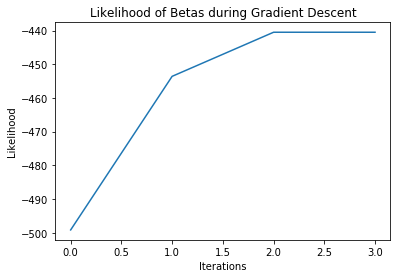

In [253]:
lr = Logistic_Regression()
gd_likelihoods,gd_beta = lr.get_coef_likelihoods(features,target,max_steps=30)
gd_likelihoods = np.array(gd_likelihoods).reshape((-1))
plt.plot(gd_likelihoods)
plt.ylabel("Likelihood")
plt.xlabel("Iterations")
plt.title("Likelihood of Betas during Gradient Descent")
plt.show()

In [254]:
print("Predictions of Beta for Gradient Descent:",gd_beta.reshape((-1)))
print("Prediction Accuracy for Gradient Descent:",np.round(lr.accuracy(features,target,gd_beta),3),'%')
print("Likelihood for Gradient Descent:",np.round(obj(features,target,gd_beta),3))
print("Number of Iterations until Convergence for Gradient Descent:",len(gd_likelihoods))

Predictions of Beta for Gradient Descent: [ 0.35523077  0.5787767   0.25519332  0.25629455  0.30364393  0.43721995
  0.31174223  0.38635934 -0.11484008]
Prediction Accuracy for Gradient Descent: 71.615 %
Likelihood for Gradient Descent: [[-440.487]]
Number of Iterations until Convergence for Gradient Descent: 4


### Using Sklearn.linear_model.LogisticRegression for Comparison

In [242]:
lr = LogisticRegression(fit_intercept=False)
lr.fit(features,np.ravel(target))

print("Predictions of Beta for Sklearn:",lr.coef_)
print("Prediction Accuracy for Sklearn:",np.round(100*lr.score(features,target),3),'%')

Predictions of Beta for Sklearn: [[ 0.4079442   1.10555527 -0.25049493  0.00913944 -0.13088899  0.69442933
   0.30860251  0.17576207 -0.85880534]]
Prediction Accuracy for Sklearn: 78.385 %
